# Railroad Incident Text Analysis

This is a notebook to demonstrate how to analyse text using Python. This notebook is meant for people who usually use Excel to anaylse data that mainly consists of text. Some basic Python knowledge is necessary.

The initial motivation for this notebook was to demonstrate to someone who is analysing railraod incidents in Britain (when rail tracks were tresspassed). I could not find a similar public dataset, however, found one which describes railroad incidents in the USA for 2019 - data source: https://safetydata.fra.dot.gov/OfficeofSafety/publicsite/on_the_fly_download.aspx

Those incidents are of different nature - they describe derailment, whether a train got struck, and other incidents that caused damages and potential hazardous materials to be released. Because I am only interested in the incident text, I deleted most columns in the dataset and only left Railroad, State, Station, County and Narrative (incident text).

I am walking through my usual steps of data exploration when I am dealing with a dataset I have never seen before and then set myself some tasks to demonstrate you how to deal with text data in Python

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Reading in the Data using Pandas

pandas is a Python library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [2]:
raw_data_df_ = pd.read_csv("rail_incident_data_USA.csv")

Ok - we encounter our first problem. While exporting the data from the website, the incident text got divided into many separate columns. We want the text to be in one column only and therefore need to merge those 15 columns into one

In [3]:
raw_data_df_.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,HE OCCUPANT OF THE VEHICLE WAS A CONFIRMED FAT...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",E IMPACT WITH ONE ANOTHER.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,G ACROSS THE TRACKS WITH HIS BIKE FROM THE WES...,LOCOMOTIVE ENGINEER SOUNDED HORN AND BELL TO W...,ASSER WAS STRUCK RESULTING IN A FATALITY. BLF...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,MOTIVE ENGINEER SOUNDED HORN AND BELL AND PLAC...,NGERS IN VEHICLE WERE TRANSPORTED TO LOCAL HOS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing Duplicates

Before I merge the NARR columns, let's check whether there are any duplicates in the data and get rid of them. Pandas has an in-built duplicated() method which we can use for that

In [4]:
#creating a new column in the dataframe that stores a boolean value whether that row is a duplicate or not
raw_data_df_['dup'] = raw_data_df_.duplicated(subset=None, keep='first')

In [5]:
#checking how many duplicates there were by counding the True and False values in that column
raw_data_df_['dup'].value_counts()

False    2401
True      284
Name: dup, dtype: int64

There are quite a few duplicates. About 10% of the dataset are duplicates. Let's delete them

In [6]:
# let's write the data into a new dataframe, only keeping the lines where the value for "dup" is False
raw_data_df = raw_data_df_[raw_data_df_['dup'] == False]

In [7]:
del raw_data_df['dup'] # deleting "dup" column since we don't need ot anymore

## Merging incident text into one column

### List slicing and lambda functions in python
Ok, a lot is going on in the function below but let's break it down
1. we are creating a new column (NARR) which will contain the whole narrative of the incident text
2. we select all columns starting from columns 7 (NARR1) until the end. That's what [6:] is going: starting from column 6 (column 0 being the first) select all the columns until the end. If we wanted to merge only NARR1 and NARR2, we would write [6:8]. In python the ending column is not included so we would select only columns 6 and 7
3. we are applying a lambda function to selected cell (x). A lambda function is a small anonymous function and comes handy when we are doing an operation only once and do not need to define a separate function for it
4. the function iterates through each cell in the row starting at position 5 and joins it with the subsequent cells as a type string. If there cell is empty we ignore it (dropna()). The reason why we are expresively defining that the cell should be of type string is because some entries might not have an incident text (all NANs) and would be picked up by python as a float type
5. the function goes through each row in the dataframe and does the merging described in 4.

In [8]:

raw_data_df['NARR'] = raw_data_df[raw_data_df.columns[6:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)



In [9]:
raw_data_df.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,NARR
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,HE OCCUPANT OF THE VEHICLE WAS A CONFIRMED FAT...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",E IMPACT WITH ONE ANOTHER.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE..."
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,G ACROSS THE TRACKS WITH HIS BIKE FROM THE WES...,LOCOMOTIVE ENGINEER SOUNDED HORN AND BELL TO W...,ASSER WAS STRUCK RESULTING IN A FATALITY. BLF...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,MOTIVE ENGINEER SOUNDED HORN AND BELL AND PLAC...,NGERS IN VEHICLE WERE TRANSPORTED TO LOCAL HOS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.


Ok, we see that it has worked - we have a new column with just NARR. But let's double check whether the function has really done what we wanted

In [10]:
raw_data_df.iloc[1,6] # NARR1 in first row 7th column

'PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECES OF EQUIPMENT, HAD 7 SEPERATE PIECES OF EQUIPMENT MAK'

In [11]:
raw_data_df.iloc[1,7] #NARR2 in first row 8th column

'E IMPACT WITH ONE ANOTHER.'

In [12]:
raw_data_df.iloc[1,21] #NARR raw_data_df.iloc[1,-1] another way of selecting last row

'PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECES OF EQUIPMENT, HAD 7 SEPERATE PIECES OF EQUIPMENT MAK E IMPACT WITH ONE ANOTHER.'

Great - it has worked! The incident text of the first two NARR columns got combined into the newly created NARR column. Now let's select only this column and the other few

In [13]:
#we want to delete columns in range 6-20
cols = list(range(6,21))

In [14]:
cols

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Why am I not just selecting the columns I need and create a new dataframe?
I could: df_new= raw_data_df[['IYR','IMO', 'STATE', 'RAILROAD', 'STATION', 'COUNTY', 'NARR]]
But imagine you have many more columns in your dataset. Doing it this way could be very tedious
However, we know the range of columns we want to delete - 6th until 19th columns, so we can define that range and tell pandas to delete that range of columns

In [15]:
raw_data_df.drop(raw_data_df.columns[cols],axis=1,inplace=True)

In [16]:
raw_data_df

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE..."
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.
...,...,...,...,...,...,...,...
2679,19,2,TRC,6,TRONA,SAN BERNARDINO,RUN 2 WAS IN THE PROCESS OF PULLING THE HEAD 1...
2680,19,2,NCTC,6,OCEANSIDE,SAN DIEGO,METROLINK 858 DERAILED AT STUART MESA YARD.
2681,19,1,MET,6,MODESTO,STANISLAUS,"ON THE MORNING OF JANUARY 15, 2019, CONDUCTOR ..."
2682,19,7,BNSF,6,BAKERSFIELD,KERN,EMPLOYEE STOPPED AND LINED THE DERAIL TO THE W...


## Data Exploration
Awesome. Finally we have our clean df and can start with our data exploration.
Let's get some feel for the data check what Railroad, state, station and county is represented the most and in what month most incidents occur. If you are interested only in the text analysis, feel free so scroll ahead

In [17]:
first_100 = raw_data_df['STATION'].value_counts()[:100]
first_100.mean()
#mean incidents per year of 100 biggest stations (cities)

10.17

In [18]:
first_100.std()
#standard deviation

6.9849115884877095

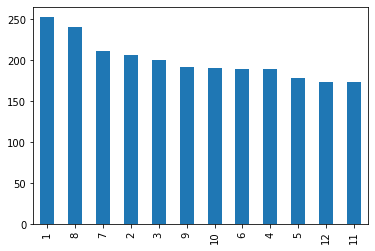

In [19]:
#months
raw_data_df['IMO'].value_counts().plot.bar()

Interesting - it seems like january and august have more incidents than the other months. 

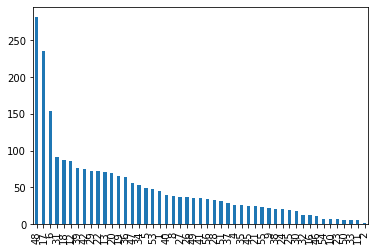

In [20]:
raw_data_df['STATE'].value_counts().plot.bar()

In [21]:
#top 5
raw_data_df['STATE'].value_counts()[:5]

48    282
17    235
6     154
31     91
18     87
Name: STATE, dtype: int64

I do not know how the states are numbered in this dataset - it does not seem to be alphabetically. Let's check it manually by County


In [22]:
raw_data_df[raw_data_df['STATE'] == 48]

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
307,19,12,XTGS,48,ANAHUAC,CHAMBERS,BALLAST WAS FOULING THE TRACK DURING LOADING A...
308,19,1,UP,48,BEAUMONT,JEFFERSON,THE YBM05R-07 HAD A HOLD OF 65 CARS IN HUMP OP...
309,19,10,TXOR,48,SWEETWATER,NOLAN,TXOR DERAILED 15 LOADED CARS OUT OF 25 LOADED ...
310,19,10,UP,48,EL PASO,EL PASO,MHNTU-24 TRAVELING WEST DERAILED THE TRAILING ...
311,19,8,UP,48,EL PASO,EL PASO,MTUEP-11 WAS SHOVING LIGHT POWER WEST IN 835 T...
...,...,...,...,...,...,...,...
2658,19,9,XTGS,48,ANAHUAC,CHAMBERS,CREW FAILED TO VERIFY LINING OF CROSSOVER SWIT...
2659,19,3,UP,48,TOYAH,REEVES,TRAIN ISINSX-03 STRUCK A SEMI TRUCK LOADED WIT...
2660,19,9,XTGS,48,ANAHUAC,CHAMBERS,CREW WAS PULLING CARS OUT OF TRACK 888 IN G-YA...
2661,19,2,UP,48,WHITSETT,LIVE OAK,THE WVJVBR-13 STRUCK A LOADED SEMI OF FRACKING...


### some of the states

48: Texas

17: Illinois

6: California

2: Alaska (not surprising)


In [23]:
raw_data_df['COUNTY'].value_counts()[:10]

COOK           106
JEFFERSON       65
LINCOLN         43
ST CLAIR        38
HARRIS          37
JACKSON         32
LOS ANGELES     31
TARRANT         27
WYANDOTTE       26
MARION          26
Name: COUNTY, dtype: int64

Cook County is only the second most populous county in the states after LA - but has almost 4 times as many incidents as LA. However, Illinois has more railway track (9,982 miles) compared to Californias 6863 miles

In [24]:
raw_data_df['STATION'].value_counts()[:10]

KANSAS CITY      48
CHICAGO          34
NORTH PLATTE     34
EAST ST LOUIS    32
MELROSE PARK     24
DAYTON           22
HOUSTON          22
FORT WORTH       17
NASHVILLE        17
LINCOLN          15
Name: STATION, dtype: int64

Wow - Kansas City in Missouri (which does not even come up in the top 5 states with most incidents) leads the table with 48 incidents in 2019. NORTH PLATTE in Nebraska is second (#5 in our list above of top 5 states). Chicago is in Illinois (#2). Melrose Park (Illinois), East St Louis (Illinois).

In [25]:
raw_data_df['RAILROAD'].value_counts()[:5]

UP      689
BNSF    403
NS      309
CSX     204
ATK     119
Name: RAILROAD, dtype: int64

it seems like UP (Union Pacific) has the most incidents. But maybe they just have more miles than the other companies. I have googled how many track miles each company has 

UP      32,100 miles
BNSF    32,500 miles 
NS      20,000 miles
CSX     21,000 miles


In [26]:
# I am storing the number of incidents and the railroad miles in lists
railroad_incidents = [689, 403, 309, 204]
railroad_miles = [32100, 32500, 20000, 21000]

In [27]:
import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

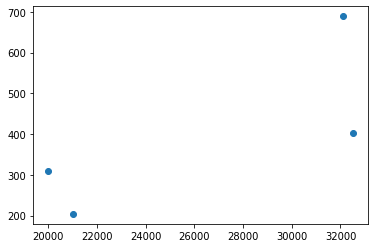

In [28]:
#lets plot number of incidents and track miles
fig, ax = plt.subplots()
ax.scatter(railroad_miles,railroad_incidents)

plt.show()


We can see that UP is clearly an outlier compared to the other 3 railroads when comparing incident number to railroad miles

## Kansas City as example
Out of curiosity I will have a look at the incidents in kansas city and save it in a new dataframe kansas_df

In [29]:
kansas_df = raw_data_df[raw_data_df['STATION'] == "KANSAS CITY"]

In [30]:
kansas_df.head()
#dataframe that only contains incidents that happened in Kansas

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
18,19,8,KCT,20,KANSAS CITY,WYANDOTTE,CREW ON UP TRAIN MNPINP-19 USING KCT MAIN LINE...
36,19,2,UP,29,KANSAS CITY,JACKSON,THE YKC20R-25 WAS HUMPING A CUT OF 100 CARS OF...
37,19,2,KCS,29,KANSAS CITY,JACKSON,CREW FAILED TO LINE BOTH ENDS OF CROSSOVER FRO...
38,19,2,KCS,29,KANSAS CITY,JACKSON,CPRS CREW FAILED TO SECURE TRACK 9 & THEY KICK...
41,19,12,KCS,29,KANSAS CITY,JACKSON,BNSF CREW RAN THRU 126 SWITCH & THEN SHOVED BA...


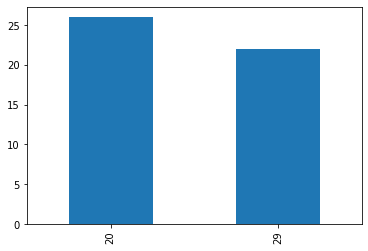

In [31]:
kansas_df['STATE'].value_counts().plot.bar()

Not sure why they divide Kansas into Kansas and Missouri if the station is the same - but it does not really matter. Given there are 49 incidents in Kansas, we see in the table with the counties with the most incidents that Jackson and Wyandotte have 58 incidents, hence only 11 outside of Kansas City. 

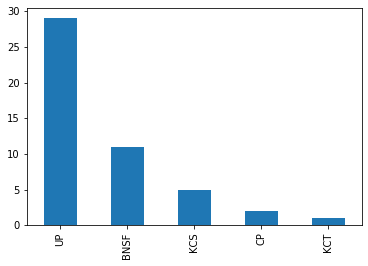

In [32]:
kansas_df['RAILROAD'].value_counts().plot.bar()

Ha - we can see that again, UP is overrepresented with incidents. accoriding to this map https://www.ksdot.org/Assets/wwwksdotorg/bureaus/burRail/Rail/publications/KansasRailroadMap2019.pdf  UP only has 300 miles more than BNSF but almost 3 times as many incidents.

It will be interesting to check the incidents texts. Let's finally dive in and check the incidents texts. First for Kansas City only. lets subdivide the kansas dataframe further into a dataframe for UP and a dataframe for the rest

In [33]:
kansas_up_df = kansas_df[kansas_df['RAILROAD'] == "UP"]

In [34]:
kansas_rr_rest_df = kansas_df[kansas_df['RAILROAD'] != "UP"]

## Some Text Preprocessing
Below you see a function which I have copy pasted from one of my own projects. it's my typical go-to text preprocessing function where I delete all stopwords symbols apart from letters, convert the text into lower case and stem or lemmatise the words.

Stopwords: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). We would not want these words to take up space in our dataset, or taking up valuable processing time. Also, wenn looking for common words in our dataset, finding out that "a" is the most common, is not particularly interesting

Lemmatising: Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

Loved -> love

Stemming: In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form

Loved -> lov

In [35]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters - more on them later
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [36]:
test_sentence = "this is a sentence to demonstrate how the preprocessing function works...!"

preprocess(test_sentence)

'sentenc demonstr preprocess function work'

you can see that "sentence" was stemmed to "sentenc", all stop words and punctuation were removed.
Let's apply that function to the incident texts in our kansas dataframe

In [37]:
kansas_up_df['NARR'] = kansas_up_df['NARR'].apply(preprocess)  #Union Pacific dataframe
kansas_rr_rest_df['NARR'] = kansas_rr_rest_df['NARR'].apply(preprocess)  #rest dataframe

## Most Common Words
In order to get an idea about a dataset, it's useful to have a look at the most common words. Reading through all incident texts is cumbersome and inefficient. Let's extract the most common key words


In [38]:
#let's check the most common words in the UP dataframe
from collections import Counter
Counter(" ".join(kansas_up_df["NARR"]).split()).most_common(10)

[('car', 55),
 ('derail', 39),
 ('track', 37),
 ('cut', 19),
 ('lead', 17),
 ('rail', 16),
 ('train', 15),
 ('switch', 12),
 ('shove', 12),
 ('hump', 11)]

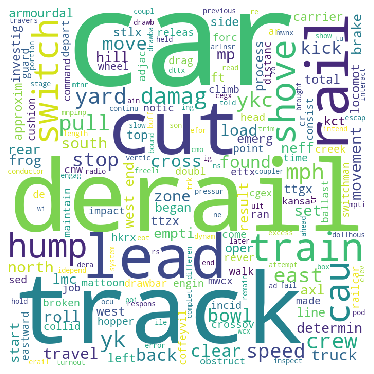

In [39]:
#nice library to produce wordclouds
from wordcloud import WordCloud

kansas_up_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in kansas_up_df["NARR"]: 

    tokens = arg.split()  
      
    kansas_up_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(kansas_up_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The word cloud above shows the most common unigrams (single words). This is useful but might also mislead. For example, we can see that "car" is the most common one. But what car? An automobile? Do trains hit cars? Let's check for most common bi-grams (two words)

In [40]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(kansas_up_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 3:
        print(i, n_gram_dic[i])
    

('cut', 'car') 6
('track', 'crew') 3
('yk', 'kick') 3
('west', 'end') 4
('car', 'cut') 3
('car', 'derail') 6
('rail', 'car') 3
('derail', 'derail') 4
('yk', 'pull') 3
('train', 'shove') 3
('track', 'damag') 4
('speed', 'mph') 3
('cut', 'empti') 3
('track', 'derail') 4


Aha - we see that "car derail" is the most common bigram. A railroad car or railcar (American and Canadian English) is a wagon. That makes more sense to me now. Seems like wagons are derailing a lot at Union Pacific - let's check the dataframe that contains the incident texts for the other companies

In [41]:

Counter(" ".join(kansas_rr_rest_df["NARR"]).split()).most_common(15)

[('track', 29),
 ('switch', 19),
 ('car', 19),
 ('railcar', 13),
 ('derail', 12),
 ('yard', 11),
 ('pull', 10),
 ('kck', 10),
 ('materi', 10),
 ('train', 9),
 ('damag', 9),
 ('releas', 9),
 ('crew', 8),
 ('line', 8),
 ('east', 8)]

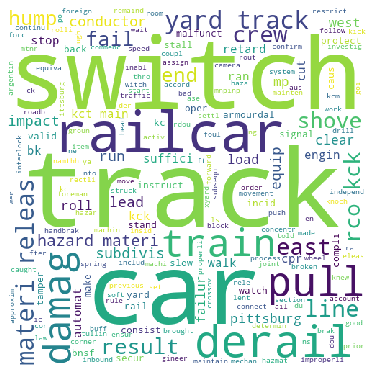

In [42]:
kansas_rr_rest_words = '' 

for arg in kansas_rr_rest_df["NARR"]: 
      
    tokens = arg.split() 
      
      
    kansas_rr_rest_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(kansas_rr_rest_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [43]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(kansas_rr_rest_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 3:
        print(i, n_gram_dic[i])
    

('kct', 'main') 3
('mp', 'pittsburg') 3
('pittsburg', 'subdivis') 3
('car', 'track') 4
('east', 'end') 3
('equip', 'damag') 4
('ran', 'switch') 3
('rco', 'kck') 7
('derail', 'railcar') 5
('railcar', 'pull') 4
('pull', 'yard') 4
('yard', 'track') 9
('hazard', 'materi') 6
('materi', 'releas') 9
('kck', 'railcar') 3
('hump', 'retard') 3
('result', 'railcar') 3
('railcar', 'derail') 3
('releas', 'rco') 3
('track', 'track') 3


Ok - it seems like UP has a derailment problem where wagons are getting off track. although there are fewer incidents in the other dataframe, the word "derailment" only comes up 11 times compared to 39 in the UP one. However, the bigram "hazardous material" and "material released" comes up a lot, so lets actually have a peak at the actual data to make sure we make the right conclusions

In [44]:

#because we already preprocessed the incident texts in the UP and Rest dataframes above, 
#we need to create a new one where it is not preprocessed so we can read the raw text
kansas_raw_rest = kansas_df[kansas_df['RAILROAD'] != "UP"]
kansas_raw_rest_list = kansas_raw_rest['NARR'].tolist()


for g in kansas_raw_rest_list[:7]:
    print(g)
    print()

CREW ON UP TRAIN MNPINP-19 USING KCT MAIN LINE AS HEAD ROOM TO SET OUT BAD ORDER IN UP ARMOURDALE YA RD, TRAIN PULLED EAST OUT OF ARMOURDALE INBOUND TO KCT MAIN 3.  CONDUCTOR MADE CUT AND INSTRUCTED EN GINEER TO PULL EAST TO CLEAR SWITCHES ON LEAD, ENGINEER BROUGHT TRAIN TO STOP USING INDEPENDENT BRAK E CAUSING BUFF FORCES IN THE TRAIN CAUSING MTNR175009 TO DERAIL ON KCT MAIN LINE.  KCT MAINTAINS TRA CK AND SIGNAL WITH DAMAGE OF $3900.  UP OWNS CONSIST WITH DAMAGE OF $7852.  #12 SUBDIVISION NAME IS LS 1001.

CREW FAILED TO LINE BOTH ENDS OF CROSSOVER FROM WORK LEAD TO 901 & DID NOT PROTECT SHOVE THRU SWITCH RESULTING IN A RUN-THRU SWITCH & WHEN PULLED FORWARD THEY DERAILED.  MP 2.5 PITTSBURG SUBDIVISION

CPRS CREW FAILED TO SECURE TRACK 9 & THEY KICKED CARS INTO TRACK 9 & CARS ROLLED OUT THE EAST END & DAMAGED 2 CARS. CPRS CONSIST INCLUDED 2 KCS CARS WITH EQUIP DAMAGE OF $36,000.  MP 4 PITTSBURG SUB

BNSF CREW RAN THRU 126 SWITCH & THEN SHOVED BACK THRU & DERAILED 2 CARS.  BNSF EQUIP D

### NO Hazardous materials 
Aha - we see that the other railroads have a different style or reporting. They report if no hazardous materials were released. Since "no" is a stopword, it was daleted from the text and one could draw the wrong conclusion that because "hazardous materials" comes up often - that it might be an issue and hence reported. But infact the opposite is the case



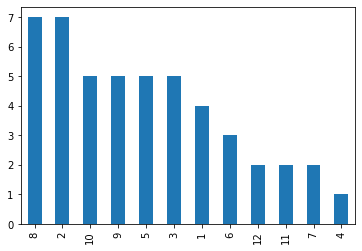

In [45]:
#let's check the month with the most incidents
kansas_df['IMO'].value_counts().plot.bar()

### Fun fact - August 2019
https://apnews.com/8f3be8700efc4a488fafc6e0d8a564f7
so apparently there were strong winds in Kansas in August 2019 and caused the derailment of over 140 cars

## Preprocessing and key word analysis of whole dataset
Ok - I am not a railroad expert so any conclusions I have drawn above may be completely wrong. I just wanted to take one city as an example and show you how to plot some graphs and do some basic text preprocessing. Let's try the same with the whole dataset

In [46]:
prep_data = raw_data_df['NARR'].apply(preprocess)

In [47]:
#lets create a column for the preprocessed data and store the original text in NARR
raw_data_df['PREP'] = prep_data 

In [48]:
raw_data_df.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR,PREP
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,camera equip train struck occupi sanit truck m...
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",product gang travel north piec equip seper pie...
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main approxim mph n...
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main notic vehicl f...
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,amtrak struck semi privat cross


In [49]:
Counter(" ".join(raw_data_df["PREP"]).split()).most_common(20)

[('car', 2640),
 ('derail', 2167),
 ('track', 2070),
 ('train', 1314),
 ('switch', 977),
 ('shove', 748),
 ('damag', 705),
 ('yard', 680),
 ('pull', 667),
 ('crew', 628),
 ('locomot', 594),
 ('lead', 559),
 ('caus', 474),
 ('engin', 458),
 ('end', 449),
 ('line', 441),
 ('railcar', 438),
 ('rail', 427),
 ('releas', 423),
 ('cross', 404)]

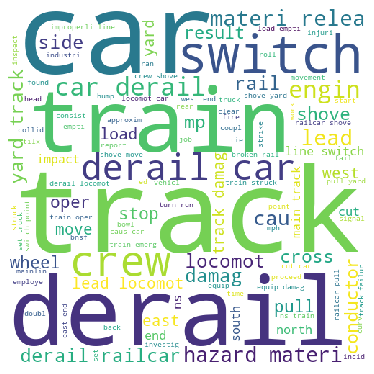

In [50]:
all_words = '' 

for arg in raw_data_df["PREP"]: 
      
    tokens = arg.split() 
      
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [51]:

n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 50:
        print(i, n_gram_dic[i])

('train', 'struck') 58
('train', 'emerg') 93
('main', 'track') 130
('line', 'switch') 136
('crew', 'shove') 58
('shove', 'yard') 78
('car', 'derail') 368
('derail', 'car') 372
('set', 'truck') 58
('derail', 'railcar') 236
('railcar', 'shove') 63
('hazard', 'materi') 303
('materi', 'releas') 310
('lead', 'locomot') 145
('locomot', 'car') 63
('car', 'track') 139
('caus', 'damag') 55
('yard', 'track') 266
('improperli', 'line') 119
('shove', 'move') 63
('turn', 'run') 57
('switch', 'hazard') 55
('train', 'oper') 68
('track', 'car') 74
('train', 'derail') 67
('track', 'failur') 58
('crew', 'pull') 53
('east', 'end') 61
('derail', 'locomot') 80
('broken', 'rail') 75
('result', 'derail') 54
('cut', 'car') 116
('car', 'roll') 50
('equip', 'damag') 89
('ns', 'train') 85
('shove', 'back') 52
('track', 'damag') 141
('caus', 'car') 85
('west', 'end') 76
('track', 'switch') 61
('track', 'derail') 86
('switch', 'point') 58
('maintain', 'track') 56
('derail', 'track') 54
('track', 'track') 90
('shov

## Derailing and Hazardous Materials
Ok, derailing is no doubt the most commin incident, followed by train strike. I want to label the rows where derailing occured and those were the train strucked something. I further want to check whether hazardous material was released and/or whether anything was damaged - negation will be an issue (eg. no hazardous materials were released, nothing was damaged). I also want to extract the damage cost so we can have a look at regular expressions

In [52]:
# storing the words in a list, in case I want to add any later
derail_words = ['derail']
struck_words = ['struck']


#checking whether any of the words appear in the incident text and store "true" or "false" in columns DERAIL and STRUCk
raw_data_df['DERAIL'] = raw_data_df['PREP'].apply(lambda x: any([k in x for k in derail_words]))
raw_data_df['STRUCK'] = raw_data_df['PREP'].apply(lambda x: any([k in x for k in struck_words]))

In [53]:
raw_data_df

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR,PREP,DERAIL,STRUCK
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,camera equip train struck occupi sanit truck m...,False,True
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",product gang travel north piec equip seper pie...,False,False
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main approxim mph n...,False,True
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main notic vehicl f...,False,True
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,amtrak struck semi privat cross,False,True
...,...,...,...,...,...,...,...,...,...,...
2679,19,2,TRC,6,TRONA,SAN BERNARDINO,RUN 2 WAS IN THE PROCESS OF PULLING THE HEAD 1...,run process pull head load saltspur track trc ...,True,False
2680,19,2,NCTC,6,OCEANSIDE,SAN DIEGO,METROLINK 858 DERAILED AT STUART MESA YARD.,metrolink derail stuart mesa yard,True,False
2681,19,1,MET,6,MODESTO,STANISLAUS,"ON THE MORNING OF JANUARY 15, 2019, CONDUCTOR ...",morn januari conductor switch car industri set...,False,False
2682,19,7,BNSF,6,BAKERSFIELD,KERN,EMPLOYEE STOPPED AND LINED THE DERAIL TO THE W...,employe stop line derail work posit pull locom...,True,False


In [54]:
# if no derailing and no striking occured, label OTHER as true
raw_data_df['OTHER'] = (raw_data_df['DERAIL'] == False) & (raw_data_df['STRUCK'] == False)

## Negation
Negation is a complex problem. What he have done so far is simple text preprocessing and analysis. Checking for negation involves dependency parsing and relationship extraction. However, judging so far the incident texts are quite simple so we might be able to get some good results with easier techniques. Let's try out these first!


Examples:
No Hazardous materials were released - check for bigram "No hazardous" and we know its a negation
No train damage - that's already more difficult. What if instead of "train" we have another word?

In [55]:
#lets take the NARR column and create a list of sentences 

In [56]:
all_narr_list = raw_data_df['NARR'].tolist()

In [57]:
all_narr_list[:5]

['CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SANITATION TRUCK AT MP 110.68, A PRIVATE RD CROSSING.  T HE OCCUPANT OF THE VEHICLE WAS A CONFIRMED FATALITY.',
 'PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECES OF EQUIPMENT, HAD 7 SEPERATE PIECES OF EQUIPMENT MAK E IMPACT WITH ONE ANOTHER.',
 'BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN AT APPROXIMATELY 79 MPH AND NOTICED A TRESPASSER COMIN G ACROSS THE TRACKS WITH HIS BIKE FROM THE WEST SIDE OF THE TRACKS TO THE EAST SIDE OF THE TRACKS. LOCOMOTIVE ENGINEER SOUNDED HORN AND BELL TO WARN TRESPASSER AND PLACED TRAIN INTO EMERGENCY.  TRESP ASSER WAS STRUCK RESULTING IN A FATALITY.  BLF COSTS WERE $15325.',
 'BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN AND NOTICED A VEHICLE FOULING HAMMONDVILLE ROAD.  LOCO MOTIVE ENGINEER SOUNDED HORN AND BELL AND PLACED TRAIN IN EMERGENCY.  TRAIN STRUCK VEHICLE AND PASSE NGERS IN VEHICLE WERE TRANSPORTED TO LOCAL HOSPITAL WITH MINOR INJURIES.  BLF COSTS WERE $10793.',
 'AMTRAK P09811 STRUCK SEMI AT PRIVA

In [58]:
from nltk import word_tokenize, bigrams, trigrams


word_data = "Dummy sentence to demonstrate bigrams"
nltk_tokens = word_tokenize(word_data) 
#using tokenize from NLKT and not split() because split() does not take into account punctuation

print(list(bigrams(nltk_tokens)))
print(list(trigrams(nltk_tokens)))

[('Dummy', 'sentence'), ('sentence', 'to'), ('to', 'demonstrate'), ('demonstrate', 'bigrams')]
[('Dummy', 'sentence', 'to'), ('sentence', 'to', 'demonstrate'), ('to', 'demonstrate', 'bigrams')]


In [59]:
# looping through all the incident texts and storing the bigrams and trigrams in separate lists
all_narr_bigrams = []
all_narr_trigrams = []

for narr in all_narr_list:
    narr = word_tokenize(narr)
    all_narr_bigrams.append(list(bigrams(narr)))
    all_narr_trigrams.append(list(trigrams(narr)))
    

In [60]:
# first incident text in bigrams
all_narr_bigrams[0]

[('CAMERA-EQUIPPED', 'TRAIN'),
 ('TRAIN', '14'),
 ('14', 'STRUCK'),
 ('STRUCK', 'AN'),
 ('AN', 'OCCUPIED'),
 ('OCCUPIED', 'SANITATION'),
 ('SANITATION', 'TRUCK'),
 ('TRUCK', 'AT'),
 ('AT', 'MP'),
 ('MP', '110.68'),
 ('110.68', ','),
 (',', 'A'),
 ('A', 'PRIVATE'),
 ('PRIVATE', 'RD'),
 ('RD', 'CROSSING'),
 ('CROSSING', '.'),
 ('.', 'T'),
 ('T', 'HE'),
 ('HE', 'OCCUPANT'),
 ('OCCUPANT', 'OF'),
 ('OF', 'THE'),
 ('THE', 'VEHICLE'),
 ('VEHICLE', 'WAS'),
 ('WAS', 'A'),
 ('A', 'CONFIRMED'),
 ('CONFIRMED', 'FATALITY'),
 ('FATALITY', '.')]

In [61]:
no_damage_bigrams = [('NO', 'DAMAGE')]
index = 0

for narr in all_narr_bigrams:
    for bi in no_damage_bigrams:
        if bi in narr:
            print(all_narr_list[index])
            print(index)
    index += 1
            

AMTRAK CALLED TO INFORM THAT THEY FOUND WHAT APPEARED TO BE DERAILMENT MARKS NEAR A TURNOUT.  CSO 1 REPORTED NOTHING OUT OF THE ORDINARY WITH THEIR TRAIN IN THAT AREA AND AFTER INSPECTING THE CARS BEI NG DELIVERED TO CSX FOUND THAT THE FICX 8735 MAY HAVE DERAILED BUT HAD NO DAMAGE AND WAS BEING SHIPP ED TO BE SCRAPPED.
176
YTU24R-29, IN AN ATTEMPT TO COUPLE THE UP4590 AND UP4509, THE DRAWBARS CROSSED CAUSING DAMAGE TO THE UP4590.  NO DERAILMENT AND NO DAMAGE TO THE UP4509.
608
TRAIN #X123 OPERATED IN ELECTRIC MODE DEPARTING HOBOKEN ENROUTE WEST ON TRACK #3 M&E AND DIVERTED ON TO TRACK 3 ML AT WEST END AND OPERATED OUT FROM UNDER T E WIRE CAUSING DAMAGE TO THE PANTOGRAPH ON E NGINE #4514. CONFIRMED NO DAMAGE TO CATENARY.
948
CLNA TRAIN 115-03 TRAVELING WESTBOUND DERAILED AT 2:50PM. A 2 FOOT SECTION OF RAIL HEAD BROKE UNDER REAR CAR OF TRAIN, DROPPING 1 WHEEL (R4) ON THE GROUND. CAR RODE THE BASE OF THE RAIL FOR 628 FEET U NTIL TRUCKS SLEWED ENOUGH TO CAUSE L4 WHEEL TO WALK OVER THE RAIL

We can see that there are no that many cases of no damage, and that some incidents specify that no damage occured to one thing but may have occured to something else. However, given we know the indexes, we can update them later manually.

In [62]:
no_damage_indexes = [176, 967, 1109, 1248, 1572, 2348]

Now let's check for trigrams. This loop requires another nested for loop since we are only interested in the first and third word (NO and DAMAGE) 

In [63]:
no_damage_trigrams = [('NO', 'whatever', 'DAMAGE')]
index = 0

for narr in all_narr_trigrams:
    for tri in no_damage_trigrams:
        for t in narr:
            if t[0] == tri[0] and t[2] == tri[2]:
                print(all_narr_list[index])
                print(index)
    index += 1

MSAFW-09 CREW WAS TRAVELING NORTH ON THE WACO SUB WHEN THEY WENT INTO UDE. THE CREW WAS TRAVELING AT 20 MPH WHEN DERAILMENT OCCURRED. IT WAS DETERMINED THAT THE ENGINEER HAD TOO MANY DYNAMIC BRAKES CU T IN ON THE LEAD LOCOMOTIVE OF CONSIST. THE EDBA ON THE CONSIST WAS 48.5 COMPARED TO A MAX ALLOWABLE OF 28. NO TRACK DAMAGE.
299
MAINTENANCE OF WAY WAS INSTRUCTED TO DUMP THE AIR ON DUMP ROCK CARS AT COBURN SO THEY COULD BE SCRAP ED.  DUE TO FROZEN MATERIAL IN THE CAR CAUSED BY WINTER WEATHER, INSTEAD OF THE MATERIAL DUMPING FRO M THE CAR, IT TIPPED THE ENTIRE CAR OVER AND OFF THE RAIL.  NO TRACK DAMAGE.
536
H02H030 WITH 7 LOADS AND 6 EMPTIES 698 TONS OPERATING NORTHBOUND FROM DUNDALK MARINE TERMINAL INTO B AYVIEW YARD ON THE PRESIDENTS STREET I.T. RECIEVED INSTRUCTIONS FROM THE BALTIMORE YARDMASTER TO ENT ER ON THE TRAPPE ROAD TRACK SUBSEQUENTLY STRIKINGOVERHEAD CSXT RAILWAY BRIDGE AND DAMAGING THE BRIDG E AS WELL AS 7 LOADED MULTILEVEL CARS. (NO LADING DAMAGE).
977
BK42-28 WAS IN THE PR

Ok, we identified a few more - but again I did it manually and added the indexes to the list above

In [64]:
no_damage_indexes.extend([299, 536, 977, 1217, 1740, 1772])

So now we have a list of indexes for incident texts where no damage occured. Now we can loop through the incident texts and check whether the word "damage" is present and the index of that incident text is not in our "no damage indexes" list. This way we weill identify those incidents where real damage occured

In [65]:
index = 0
damage_indexes = []
for narr in all_narr_list:  
    n = word_tokenize(narr)
    if ('DAMAGE' in n or 'DAMAGED' in n) and index not in no_damage_indexes:
        #print(narr)
        #print(index)
        damage_indexes.append(index)
    index +=1

In [66]:
len(damage_indexes)

394

## Fixing No derailment

Remember, above when we extracted key words we extracted "derail" and labeled the column "Derailed" as True?
Now we know that some incidents report that NO derailment occured. We have not accounted for negation above, so we need to fix that



In [73]:
no_derail_bigram = [('NO', 'DERAILMENT'), ('NOT', 'DERAILED')]
index = 0
no_derail_indexes = []

for narr in all_narr_bigrams:  
    for bi in no_derail_bigram:
        if bi in narr:
            #print(all_narr_list[index])
            #print(index)
            no_derail_indexes.append(index)
    index += 1
            

In [74]:
len(no_derail_indexes)

86

## Hazardous materials
now we want to do the same as above but with hazardous materials

Code will throw error - use all_narr_bigrams for now

In [86]:
no_hazard_bigrams = [('NO', 'HAZARDOUS'), ('NO', 'HAZMAT'), ('NO', 'LEAKS'), ('O', 'HAZMAT'), ('O', 'HAZARDOUS')] #<<- insert  ('NO', 'LEAKS'),('O', 'HAZMAT'), ('O', 'HAZARDOUS') here
index = 0
no_hazmat_indexes = []

for narr in all_narr_bigrams:   
    for bi in no_hazard_bigrams:
        if bi in narr:
            #print(all_narr_list[index])
            #print(index)
            no_hazmat_indexes.append(index)
    index += 1
            

In [87]:
len(no_hazmat_indexes)

352

Let's print put the incident texts where there should be hazmat releases

In [88]:
index = 0
for narr in all_narr_list: 
    n = narr.split()
    if ('HAZARDOUS' in n or 'HAZMAT' in n) and index not in no_hazmat_indexes:
        print(narr)
        print(index)
    index +=1
    

THE MANISTEE-21 CREW WAS SWITCHING PACKAGING CORPORATION OF AMERICA WITH 16X12 WHEN FOUR LOADED ASPH ALT TANK CARS (SEQUENCE: 13, 14, 15, 16) DERAILED NEAR THE GATE BETWEEN MQT AND TONDU (PACKAGING COR PORATION OF AMERICA).  4 HAZMAT (CLASS 9) CARS DERAILED, UPRIGHT AND NOT LEAKING.
229
THE MRENL-20 DERAILED THREE LOADED AUTO RACKS AT MP 351.06 ON THE REISOR SUB.  THERE ARE NO INJURIES OR HAZMAT RELEASES ASSOCIATED WITH THIS DERAILMENT.  1 DRUG POSITIVE - NOT DETERMINED TO BE A CAUSA L FACTOR.
362
AT 1240 ON JUNE 9TH 2019 THE 0759 EH WAS SHOVING WEST UP 3 EAST APPROACH AND COLLIDED AT THE TOP OF THE HUMP WITH THE 0630 EAST HUMP ASSIGNMENT WHO WAS IN THE PROCESS OF HUMPING WESTWARD OFF OF 01EAPR . NO ONE WAS INJURED FROM THIS INCIDENT HOWEVER THERE WAS A TOTAL OF FOURTEEN CARS DAMAGED OF WHICH 10 OF THE CARS WERE DERAILED OF THE DERAILED CARS SIX OF THEM WERE ON THEIR SIDE JUST TO THE NORTH O F THE EAST HUMP LEADS AT THE TOP OF THE HUMP. MOST OF THE DAMAGED EQUIPMENT WERE TANK CARS IN W

And we encounter a problem. it seems like either during typing the incident texts, or during merging of the columns, "NO" becamse "N O". However, this is an easy fix. Let's insert another bigram into our list above and rerun the cells from there


In [90]:
index = 0
hazmat_released_indexes = []
for narr in all_narr_list:
    n = narr.split()
    if ('HAZARDOUS' in n or 'HAZMAT' in n) and index not in no_hazmat_indexes:
        print(narr)
        print(index)
        hazmat_released_indexes.append(index)
    index +=1
    

THE MANISTEE-21 CREW WAS SWITCHING PACKAGING CORPORATION OF AMERICA WITH 16X12 WHEN FOUR LOADED ASPH ALT TANK CARS (SEQUENCE: 13, 14, 15, 16) DERAILED NEAR THE GATE BETWEEN MQT AND TONDU (PACKAGING COR PORATION OF AMERICA).  4 HAZMAT (CLASS 9) CARS DERAILED, UPRIGHT AND NOT LEAKING.
229
THE MRENL-20 DERAILED THREE LOADED AUTO RACKS AT MP 351.06 ON THE REISOR SUB.  THERE ARE NO INJURIES OR HAZMAT RELEASES ASSOCIATED WITH THIS DERAILMENT.  1 DRUG POSITIVE - NOT DETERMINED TO BE A CAUSA L FACTOR.
362
AT 1240 ON JUNE 9TH 2019 THE 0759 EH WAS SHOVING WEST UP 3 EAST APPROACH AND COLLIDED AT THE TOP OF THE HUMP WITH THE 0630 EAST HUMP ASSIGNMENT WHO WAS IN THE PROCESS OF HUMPING WESTWARD OFF OF 01EAPR . NO ONE WAS INJURED FROM THIS INCIDENT HOWEVER THERE WAS A TOTAL OF FOURTEEN CARS DAMAGED OF WHICH 10 OF THE CARS WERE DERAILED OF THE DERAILED CARS SIX OF THEM WERE ON THEIR SIDE JUST TO THE NORTH O F THE EAST HUMP LEADS AT THE TOP OF THE HUMP. MOST OF THE DAMAGED EQUIPMENT WERE TANK CARS IN W

above are the few incidents that actually involved hazardous materials to be released. There are only a few so we can go through them "by hand" and identify that there are some others where nothing was released but was not picked up by our bi-gram identified because there were several words between "no" and "hazmat". We can therefore create an
index list for those incidents where hazmat was released and delete those that are wrong

In [91]:
hazmat_released_indexes

[229, 362, 571, 620, 706, 707, 879, 967, 1317, 1431, 1983, 2048, 2055, 2370]

In [92]:
no_hazmat_add = [ 879,1431, 2048, 2370]
hazmat_indexes_final = [x for x in hazmat_released_indexes if x not in no_hazmat_add]
hazmat_indexes_final

[229, 362, 571, 620, 706, 707, 967, 1317, 1983, 2055]

## Putting everything together before final thing
so we have a list of indexes for
- hazardous material release
- damages
- where no derailment occured
lets update our dataframe with these

In [93]:
# populating boolean lists
len(all_narr_list)

2401

In [94]:
#lets populate three lists with boolean values
hazard =[False] * 2401
damages = [False] * 2401

In [95]:
#the derail column already exists so lets extract that into a list so we can update it
derail_old = raw_data_df['DERAIL'].tolist()

In [96]:
for index in no_derail_indexes:
    derail_old[index] = False

In [97]:
for index in hazmat_released_indexes:
    hazard[index] = True

In [98]:
for index in damage_indexes:
    damages[index] = True

In [99]:
del raw_data_df['OTHER']

In [100]:
del raw_data_df['DERAIL']

In [101]:
raw_data_df['DERAIL'] = derail_old

In [102]:
raw_data_df['OTHER'] = (raw_data_df['DERAIL'] == False) & (raw_data_df['STRUCK'] == False)

In [103]:
raw_data_df['HAZMAT'] = hazard

In [104]:
raw_data_df['DAMAGE'] = damages

In [105]:
raw_data_df

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR,PREP,STRUCK,DERAIL,OTHER,HAZMAT,DAMAGE
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,camera equip train struck occupi sanit truck m...,True,False,False,False,False
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",product gang travel north piec equip seper pie...,False,False,True,False,False
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main approxim mph n...,True,False,False,False,False
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main notic vehicl f...,True,False,False,False,False
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,amtrak struck semi privat cross,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,19,2,TRC,6,TRONA,SAN BERNARDINO,RUN 2 WAS IN THE PROCESS OF PULLING THE HEAD 1...,run process pull head load saltspur track trc ...,False,True,False,False,False
2680,19,2,NCTC,6,OCEANSIDE,SAN DIEGO,METROLINK 858 DERAILED AT STUART MESA YARD.,metrolink derail stuart mesa yard,False,True,False,False,False
2681,19,1,MET,6,MODESTO,STANISLAUS,"ON THE MORNING OF JANUARY 15, 2019, CONDUCTOR ...",morn januari conductor switch car industri set...,False,False,True,False,True
2682,19,7,BNSF,6,BAKERSFIELD,KERN,EMPLOYEE STOPPED AND LINED THE DERAIL TO THE W...,employe stop line derail work posit pull locom...,False,True,False,False,False


## Extracting Amount of Damages in \$

In [106]:
test = "sentence to check whether it finds the damage of $400,000 "

amount = re.findall(r"\$[-0-9.,]+[-0-9.,a-zA-Z]*\b", test)
amount

['$400,000']

In [108]:
damages_amounts = []
index = 0

for narr in all_narr_list:
    amount = re.findall(r"\$[-0-9.,]+[-0-9.,a-zA-Z]*\b", narr)
    if len(amount) == 0:
        damages_amounts.append([0])
        
    else:
        #piece of code explained below
        for a in amount:
            if a[-1] == 'K':   #K
                print(amount)
                print(index)
        
        damages_amounts.append(amount)
    
    index += 1

['$18K']
137
['$15K']
257
['$45K']
564
['$3K']
1482
['$8500K', '$81660']
1816


By manually inspecting the incidents where there are several amounts, there is one at index 508 that lists all the different damages and then totaling it (the other incident reports don't do that) and another incident at index 1235 shows a range (800,000 - 1,000,000). I will therefore manually change the amounts for those incidents and for the rest I will create separate columns for each damage and totaling them


508  $11071.46  (total)

1235  $1,000,000  (range)


Also, I ran into an error below so I had to insert the loop above that checks for a K at the end of the damage amount string because some incident reports write 5K instead of 5,000. I am therefore fixing those amounts 

In [113]:
damages_amounts[508] = ['$11071.46']
damages_amounts[1235] = ['$1,000,000']
damages_amounts[137] = ['$18.000']
damages_amounts[257] = ['$15,000']
damages_amounts[564] = ['$45,000']
damages_amounts[1482] = ['$3,000']
damages_amounts[1816] = ['$8500000', '$81660']

I want to store all the damage amounts reported in the incident text in separate columns. In order to know how many columns we need, we need to find the list with the maximum entries. this is the maximum number of columns we need

In [114]:

def find_max_list(list):
    list_len = [len(i) for i in list]
    print(max(list_len))

#print output#
find_max_list(damages_amounts)

5


In [115]:
columns = ['damages_1', 'damages_2', 'damages_3', 'damages_4', 'damages_5']
damages_dff = pd.DataFrame(damages_amounts,columns=columns)

In [116]:
damages_dff[:10]

,damages_1,damages_2,damages_3,damages_4,damages_5
0,0,None,None,None,None
1,0,None,None,None,None
2,$15325,None,None,None,None
3,$10793,None,None,None,None
4,0,None,None,None,None
5,$615.33,None,None,None,None
6,0,None,None,None,None
7,0,None,None,None,None
8,0,None,None,None,None
9,0,None,None,None,None


# Creating a total column
I on purpose left the dollar sign in the pandas dataframe, to imitate another problem you might encounter with raw data and did not convert the numbers into float. imagine you get numbers in different formats e.g. 1000 vs 1000.00 vs 1,000

I don't know how to deal with that problem, since you cannot convert 1,000 into a float. I guess it is another regular expression I need which deletes the $ sign and the commas from the numbers. Let's google it!

This is what I found when googling

https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas

In [117]:
damages_dff[damages_dff.columns[0:]] = damages_dff[damages_dff.columns[0:]].replace('[\$,]', '', regex=True).astype(float)

## Creating a total damages column

I want to sum up the damages, if there were several amounts reported. Let's sum up all the damages in a row and store the total amount in a new column

In [118]:
damages_dff['damages_total'] = damages_dff[list(damages_dff.columns)].sum(axis=1)

In [119]:
damages_dff

,damages_1,damages_2,damages_3,damages_4,damages_5,damages_total
0,0.0,NaN,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,NaN,NaN,0.0
2,15325.0,NaN,NaN,NaN,NaN,15325.0
3,10793.0,NaN,NaN,NaN,NaN,10793.0
4,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2396,0.0,NaN,NaN,NaN,NaN,0.0
2397,0.0,NaN,NaN,NaN,NaN,0.0
2398,0.0,NaN,NaN,NaN,NaN,0.0
2399,0.0,NaN,NaN,NaN,NaN,0.0


## Inserting total into our original dataframe

In order to join two dataframes in pandas, we need a common column. Our damages and original dataframe do not have a common column so we need to create one

In [120]:
#we need a common column to merge two dataframes - so I am creating an index column
damages_dff['i'] = damages_dff.reset_index().index
raw_data_df['i'] = raw_data_df.reset_index().index

damages_final = damages_dff[['damages_total', 'i']]



#del final_df['PREP']

In [121]:
final_df = pd.merge(raw_data_df, damages_final, on='i', how='outer')


In [122]:
final_df.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR,PREP,STRUCK,DERAIL,OTHER,HAZMAT,DAMAGE,i,damages_total
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,camera equip train struck occupi sanit truck m...,True,False,False,False,False,0,0.0
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",product gang travel north piec equip seper pie...,False,False,True,False,False,1,0.0
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main approxim mph n...,True,False,False,False,False,2,15325.0
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,blf travel southbound east main notic vehicl f...,True,False,False,False,False,3,10793.0
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,amtrak struck semi privat cross,True,False,False,False,False,4,0.0


In [123]:
del final_df['i']



In [125]:
del final_df['PREP']

In [126]:
final_df.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR,STRUCK,DERAIL,OTHER,HAZMAT,DAMAGE,damages_total
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,True,False,False,False,False,0.0
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",False,False,True,False,False,0.0
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,True,False,False,False,False,15325.0
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,True,False,False,False,False,10793.0
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,True,False,False,False,False,0.0


Oh well, the "damage" column is redundant since the $ amount indicates whether there was any damage or not - even if we could not find the "damage" keyword in the incident text. But it was just for the sake of practicing anyway, so I will leave it now as it is. It is not the most exciting dataset to play around

In [127]:
final_df.to_csv('railroad_incidents_analysis.csv')